In [1]:
import os
import time

from tp1.manejo_archivos_analisis import leer_archivo
from tp1.tiempo_optimo import tiempo_optimo

directorio = 'data/'  
archivos = os.listdir(directorio)
archivos = sorted(archivos, key=lambda archivo: int(archivo.split(' ')[0]))
resultado = []

for archivo in archivos:
    print("Trabajando con archivo: " + archivo)
    tiempos_analisis = leer_archivo(directorio + archivo)
    
    tiempo_inicio = time.time()
    tiempo_optimo(tiempos_analisis)
    tiempo_fin = time.time()
    
    tiempo_ejecucion = (tiempo_fin - tiempo_inicio) * 1000
    medicion = (len(tiempos_analisis), round(tiempo_ejecucion, 2))
    print(f"N= {medicion[0]} T={medicion[1]} ms")
    resultado.append(medicion)

print(resultado)


Trabajando con archivo: 10000 elementos.txt
N= 10000 T=23.33 ms
Trabajando con archivo: 20000 elementos.txt
N= 20000 T=13.65 ms
Trabajando con archivo: 30000 elementos.txt
N= 30000 T=13.56 ms
Trabajando con archivo: 40000 elementos.txt
N= 40000 T=19.76 ms
Trabajando con archivo: 50000 elementos.txt
N= 50000 T=27.81 ms
Trabajando con archivo: 60000 elementos.txt
N= 60000 T=31.88 ms
Trabajando con archivo: 70000 elementos.txt
N= 70000 T=47.74 ms
Trabajando con archivo: 80000 elementos.txt
N= 80000 T=45.29 ms
Trabajando con archivo: 90000 elementos.txt
N= 90000 T=59.84 ms
Trabajando con archivo: 100000 elementos.txt
N= 100000 T=58.68 ms
Trabajando con archivo: 110000 elementos.txt
N= 110000 T=79.32 ms
Trabajando con archivo: 120000 elementos.txt
N= 120000 T=72.6 ms
Trabajando con archivo: 130000 elementos.txt
N= 130000 T=81.91 ms
Trabajando con archivo: 140000 elementos.txt
N= 140000 T=91.06 ms
Trabajando con archivo: 150000 elementos.txt
N= 150000 T=124.86 ms
Trabajando con archivo: 1600

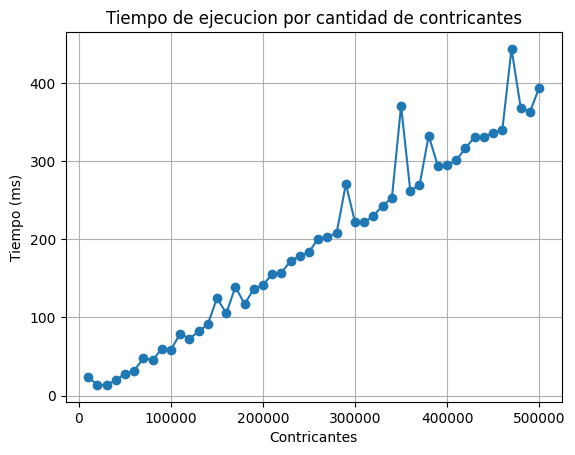

In [2]:
import matplotlib.pyplot as plt

contricantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contricantes, tiempos, label= "Tiempo segun cantidad de contricantes",  marker='o', linestyle='-')
plt.xlabel('Contricantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contricantes')
plt.grid(True)

plt.show()